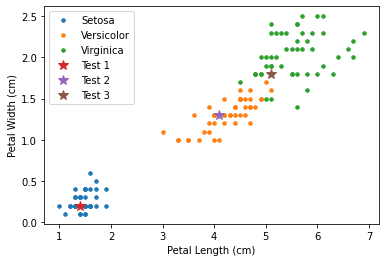

In [8]:
# Answer 4
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

with open("Iris_dataset.csv", 'r') as input, open('Iris.csv', 'w') as output:
    reader = csv.reader(input, delimiter = ',')
    writer = csv.writer(output, delimiter = ',',lineterminator='\n')
    all = []
    row = next(reader)
    row.insert(0, 'ID')
    all.append(row)
    for k, row in enumerate(reader):
        all.append([str(k+1)] + row)
    writer.writerows(all)
    


with open('Iris.csv', 'r') as fin, open('train_iris.csv', 'w', newline='') as fout :

    # define reader and writer objects
    reader = csv.reader(fin, skipinitialspace=True)
    writer = csv.writer(fout, delimiter=',')
    # write headers
    writer.writerow(next(reader))
    #writer2.writerow(next(reader))
    # iterate and write rows based on condition
    
    for i in reader:
        if (int(i[0])% 50):
            writer.writerow(i)
     #   else :    
      #      writer2.writerow(i)

with open('iris.csv', 'r') as fin, open('test_iris.csv', 'w', newline='') as fout :

    # define reader and writer objects
    reader = csv.reader(fin, skipinitialspace=True)
    writer = csv.writer(fout, delimiter=',')
    # write headers
    writer.writerow(next(reader))
    #writer2.writerow(next(reader))
    # iterate and write rows based on condition
    for i in reader:
        if not int(i[0])% 50:
            writer.writerow(i)    
df_train = pd.read_csv('train_iris.csv', sep=',',header=0, index_col =0)
#df_test = pd.read_csv('test_iris.csv', sep=',',header=0, index_col =0)
groups = df_train.groupby("variety")


df_test = pd.read_csv('test_iris.csv', sep=',',header=0, index_col =0)
#sns.scatterplot(data=df_train,x='PetalLengthCm', y='PetalWidthCm', hue='Species')


fig = plt.figure()
ax1 = fig.add_subplot(111)
i=1
for name, group in groups:
    
    plt.plot(group["petal.length"], group["petal.width"], marker="o", linestyle="",markersize=3.5, label=name)
    
groups=df_test.groupby("variety")    
for name, group in groups:

    plt.plot(group["petal.length"], group["petal.width"], marker="*", linestyle="",markersize=10.5,label="Test "+str(i))
    i=i+1

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
#plt.gca().legend(('Iris-setosa','Iris-versicolor','Iris-virginica'))

plt.legend(loc='upper left');
plt.show()
####df_train.head(5).append(df_train.tail(5))


In [10]:
[mean_setosa_l, mean_setosa_w]=df_train[['petal.length','petal.width']].iloc[0:49].mean()
print("Mean(len,wid) of Iris-setosa:",mean_setosa_l, mean_setosa_w)

[mean_versicolor_l, mean_versicolor_w]=df_train[['petal.length','petal.width']].iloc[49:98].mean()
print("Mean(len,wid) of Iris-versicolor:",mean_versicolor_l, mean_versicolor_w)

[mean_virginica_l, mean_virginica_w]=df_train[['petal.length','petal.width']].iloc[98:-1].mean()
print("Mean(len,wid) of Iris-virginica:",mean_virginica_l, mean_virginica_w)

[std_setosa_l, std_setosa_w]=df_train[['petal.length','petal.width']].iloc[0:49].std()
print("Std. Deviation(len,wid) of Iris-sentosa:",std_setosa_l, std_setosa_w)

[std_versicolor_l, std_versicolor_w]=df_train[['petal.length','petal.width']].iloc[49:98].std()
print("Std. Deviation(len,wid) of Iris-versicolor:",std_versicolor_l, std_versicolor_w)

[std_virginica_l, std_virginica_w]=df_train[['petal.length','petal.width']].iloc[98:-1].std()
print("Std. Deviation(len,wid) of Iris-virginica:",std_virginica_l, std_virginica_w)

Mean(len,wid) of Iris-setosa: 1.463265306122449 0.24693877551020407
Mean(len,wid) of Iris-versicolor: 4.263265306122449 1.3265306122448979
Mean(len,wid) of Iris-virginica: 5.564583333333334 2.0250000000000004
Std. Deviation(len,wid) of Iris-sentosa: 0.17523065460393958 0.10626625525914951
Std. Deviation(len,wid) of Iris-versicolor: 0.47420717938427703 0.19976601959551082
Std. Deviation(len,wid) of Iris-virginica: 0.5590606039288122 0.2756037859110622


In [11]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    mahaldist=np.transpose(x_minus_mu)@inv_covmat@x_minus_mu
    return mahaldist

In [13]:
test1 = df_test[['petal.length','petal.width']].iloc[0]
test2 = df_test[['petal.length','petal.width']].iloc[1]
test3 = df_test[['petal.length','petal.width']].iloc[2]

#Defining the mean vectors (Centroid of each Type of Iris subset)
mean_vec_setosa  =  [mean_setosa_l, mean_setosa_w]
mean_vec_versicolor = [mean_versicolor_l, mean_versicolor_w]
mean_vec_virginica = [mean_virginica_l, mean_virginica_w] 

dist11=mahalanobis(x=test1,data=df_train[['petal.length','petal.width']].iloc[0:49])
print("Mahalanobis Distance between test 1 and Iris-Setosa :",dist11)
dist12=mahalanobis(x=test1,data=df_train[['petal.length','petal.width']].iloc[49:98])
print("Mahalanobis Distance between test 1 and Iris-Versicolor :",dist12)
dist13=mahalanobis(x=test1,data=df_train[['petal.length','petal.width']].iloc[98:-1])
print("Mahalanobis Distance between test 1 and Iris-Virginica :",dist13)
least_dist1=min([dist11,dist12,dist13])

######################################################################

dist21=mahalanobis(x=test2,data=df_train[['petal.length','petal.width']].iloc[0:49])
print("\nMahalanobis Distance between test 2 and Iris-Setosa :",dist21)
dist22=mahalanobis(x=test2,data=df_train[['petal.length','petal.width']].iloc[49:98])
print("Mahalanobis Distance between test 2 and Iris-Versicolor  :",dist22)
dist23=mahalanobis(x=test2,data=df_train[['petal.length','petal.width']].iloc[98:-1])
print("Mahalanobis Distance between test 2 and Iris-Virginica :",dist23)
least_dist2=min([dist21,dist22,dist23])
######################################################################

dist31=mahalanobis(x=test3,data=df_train[['petal.length','petal.width']].iloc[0:49])
print("\nMahalanobis Distance between test 3 and Iris-Setosa :",dist31)
dist32=mahalanobis(x=test3,data=df_train[['petal.length','petal.width']].iloc[49:98])
print("Mahalanobis Distance between test 3 and Iris-Versicolor  :",dist32)
dist33=mahalanobis(x=test3,data=df_train[['petal.length','petal.width']].iloc[98:-1])
print("Mahalanobis Distance between test 3 and Iris-Virginica :",dist33)
least_dist3=min([dist31,dist32,dist33])

hash_map={0:"Iris-Setosa",1:"Iris-Veritosa",2:"Iris-Virginica"}
print("################################################\n")
print("Hence we see that Test 1 belongs to : %s \n"%hash_map[[dist11,dist12,dist13].index(least_dist1)])
print("Test 2 belongs to : %s, \n"%hash_map[[dist21,dist22,dist23].index(least_dist2)])
print("Test 3 belongs to : %s \n"%hash_map[[dist31,dist32,dist33].index(least_dist3)])

Mahalanobis Distance between test 1 and Iris-Setosa : 0.2472061126416084
Mahalanobis Distance between test 1 and Iris-Versicolor : 38.529481436943705
Mahalanobis Distance between test 1 and Iris-Virginica : 75.38448173304688

Mahalanobis Distance between test 2 and Iris-Setosa : 253.9268491734468
Mahalanobis Distance between test 2 and Iris-Versicolor  : 0.16859818594233666
Mahalanobis Distance between test 2 and Iris-Virginica : 10.425139710366953

Mahalanobis Distance between test 3 and Iris-Setosa : 498.5725606590601
Mahalanobis Distance between test 3 and Iris-Versicolor  : 5.643923084730123
Mahalanobis Distance between test 3 and Iris-Virginica : 1.0265292345715828
################################################

Hence we see that Test 1 belongs to : Iris-Setosa 

Test 2 belongs to : Iris-Veritosa, 

Test 3 belongs to : Iris-Virginica 



In [15]:
####Also compared and done with Cosine distance to get a similar answer

from numpy.linalg import norm

test1 = df_test[['petal.length','petal.width']].iloc[0]
test2 = df_test[['petal.length','petal.width']].iloc[1]
test3 = df_test[['petal.length','petal.width']].iloc[2]

#Defining the mean vectors (Centroid of each Type of Iris subset)
mean_vec_setosa  =  [mean_setosa_l, mean_setosa_w]
mean_vec_versicolor = [mean_versicolor_l, mean_versicolor_w]
mean_vec_virginica = [mean_virginica_l, mean_virginica_w] 

###Finding Cosine similarities and distances between Test-1 vector and centroid###
cos_sim = np.dot(test1, mean_vec_setosa)/(norm(test1)*norm(mean_vec_setosa))
print("Cosine distance between Test-1 and Mean of Iris-Setosa=",1-cos_sim)

cos_sim = np.dot(test1, mean_vec_versicolor)/(norm(test1)*norm(mean_vec_versicolor))
print("Cosine distance between Test-1 and Mean of Iris-Versicolor=",1-cos_sim)

cos_sim = np.dot(test1, mean_vec_virginica)/(norm(test1)*norm(mean_vec_virginica))
print("Cosine distance between Test-1 and Mean of Iris-Virginica=",1-cos_sim)

## We find that Test-1 is closest to Iris-Setosa and hence is classified as the same
print("-------------------------------------------------------------")

###Finding Cosine similarities and distances between Test-2 vector and centroid###
cos_sim = np.dot(test2, mean_vec_setosa)/(norm(test2)*norm(mean_vec_setosa))
print("Cosine distance between Test-2 and Mean of Iris-Setosa=",1-cos_sim)

cos_sim = np.dot(test2, mean_vec_versicolor)/(norm(test2)*norm(mean_vec_versicolor))
print("Cosine distance between Test-2 and Mean of Iris-Versicolor=",1-cos_sim)

cos_sim = np.dot(test2, mean_vec_virginica)/(norm(test2)*norm(mean_vec_virginica))
print("Cosine distance between Test-2 and Mean of Iris-Virginica=",1-cos_sim)
## We find that Test-2 is closest to Iris-Versicolor and hence is classified as the same

print("-------------------------------------------------------------")
###Finding Cosine similarities and distances between Test-3 vector and centroid###
cos_sim = np.dot(test3, mean_vec_setosa)/(norm(test3)*norm(mean_vec_setosa))
print("Cosine distance between Test-3 and Mean of Iris-Setosa=",1-cos_sim)

cos_sim = np.dot(test3, mean_vec_versicolor)/(norm(test3)*norm(mean_vec_versicolor))
print("Cosine distance between Test-3 and Mean of Iris-Versicolor=",1-cos_sim)

cos_sim = np.dot(test3, mean_vec_virginica)/(norm(test3)*norm(mean_vec_virginica))
print("Cosine distance between Test-3 and Mean of Iris-Virginica=",1-cos_sim)
## We find that Test-2 is closest to Iris-Virginica and hence is classified as the same

print("################################################\n")
print("Taking the minimum distances, Hence we see that Test 1 belongs to Iris-Setosa, \n")
print("Test 2 belongs to Iris-Veritosa, \n")
print("and, Test 3 belongs to Iris-Virginica, \n")


Cosine distance between Test-1 and Mean of Iris-Setosa= 0.00031968493880796256
Cosine distance between Test-1 and Mean of Iris-Versicolor= 0.012734633894870173
Cosine distance between Test-1 and Mean of Iris-Virginica= 0.021371628787493213
-------------------------------------------------------------
Cosine distance between Test-2 and Mean of Iris-Setosa= 0.00976478964256422
Cosine distance between Test-2 and Mean of Iris-Versicolor= 1.4514646098251482e-05
Cosine distance between Test-2 and Mean of Iris-Virginica= 0.0008804322607474102
-------------------------------------------------------------
Cosine distance between Test-3 and Mean of Iris-Setosa= 0.014774251149455075
Cosine distance between Test-3 and Mean of Iris-Versicolor= 0.0007081044768502132
Cosine distance between Test-3 and Mean of Iris-Virginica= 4.7227682217987343e-05
################################################

Taking the minimum distances, Hence we see that Test 1 belongs to Iris-Setosa, 

Test 2 belongs to Iris-V